# problem statement

In this study, we will try to see if we can predict the Avocado’s Average Price based on different features. The features are different (Total Bags,Date,Type,Year,Region…).

# dataset information

Avocado is a fruit consumed by people heavily in the United States. 

This data was downloaded and provided by INSAID, from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.
Represents weekly 2018 retail scan data for National retail volume (units) and price.
The dataset comprises of 18249 observations of 14 columns



# dataset attributes information

The variables of the dataset are the following:

Categorical: ‘region’,’type’
    
Date: ‘Date’
    
Numerical:‘Unamed: 0’,’Total Volume’, ‘4046’, ‘4225’, ‘4770’, ‘Total Bags’, ‘Small Bags’,’Large Bags’,’XLarge Bags’,’Year’
‘AveragePrice’
    

Below is showing names of all the columns and their description.

The unclear numerical variables terminology is explained below
    

Unamed: 0’ : Its just a useless index feature that will be removed later
        
,’Total Volume’ : Total sales volume of avocados and bags
    
‘4046’ : Total sales volume of Small/Medium Hass Avocado
    
‘4225’ : Total sales volume of Large Hass Avocado
    
‘4770’ : Total sales volume of Extra Large Hass Avocado
    
‘Total Bags’: Total number of Bags sold
    
‘Small Bags’: Total number of Small Bags sold
    
Large Bags’: Total number of Large Bags sold
    
‘XLarge Bags’: Total number of XLarge Bags sold


# target variable

AveragePrice

# import modules

In [35]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# loading the dataset

In [36]:
df=pd.read_csv("C:\\Users\\batha\\Downloads\\avocado.csv.zip")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [37]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, we'll remove it in pre-processing !

In [38]:
df.shape

(18249, 14)

this dataset has 18249 rows and 14 columns

In [39]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

# data type of attributes¶

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


# statistical info¶

In [41]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


We can see all columns having count 18249. Looks like it doesn't contain missing values

# check unique values in the dataset¶

In [42]:
df.apply(lambda x: len(x.unique()))

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

# preprocessing the dataset

check for null values

In [43]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

We can see that no missing values exist in dataset, that's great!

check for categorical attributes

In [44]:
cat_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='object':
        cat_col.append(x)
        
cat_col

['Date', 'type', 'region']

In this dataset Date is object type so we would convert it into Date type

check for numerical attributes

In [45]:
num_col=[]
for x in df.dtypes.index:
    if df.dtypes[x]=='float64':
        num_col.append(x)
        
num_col

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']

The Feature "Unnamed:0" is just a representation of the indexes, so it's useless to keep it, we'll remove it.

In [46]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [47]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Earlier in info we have seen that Date is Object type not the date type. We have to change its type to date type.

In [48]:
df['Date']=pd.to_datetime(df['Date'])

In [49]:
df['Date']

0       2015-12-27
1       2015-12-20
2       2015-12-13
3       2015-12-06
4       2015-11-29
           ...    
18244   2018-02-04
18245   2018-01-28
18246   2018-01-21
18247   2018-01-14
18248   2018-01-07
Name: Date, Length: 18249, dtype: datetime64[ns]

Creation of new attributes

In [50]:
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

Lets check the head to see what we have done:

In [51]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


# Exploratory Data Analysis

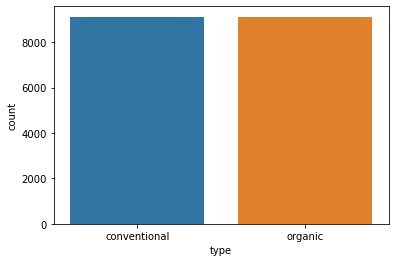

In [52]:
sns.countplot(df['type'])

in this dataset both Avocados organic and Conventional are in same quantity

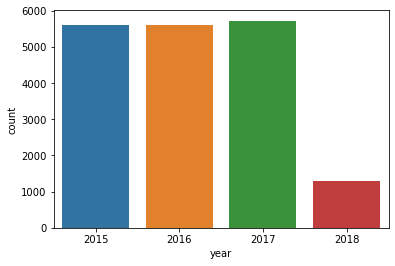

In [53]:
sns.countplot(df['year'])

In 2017 Avocados was used heavily and in 2018 it was used in low quantity

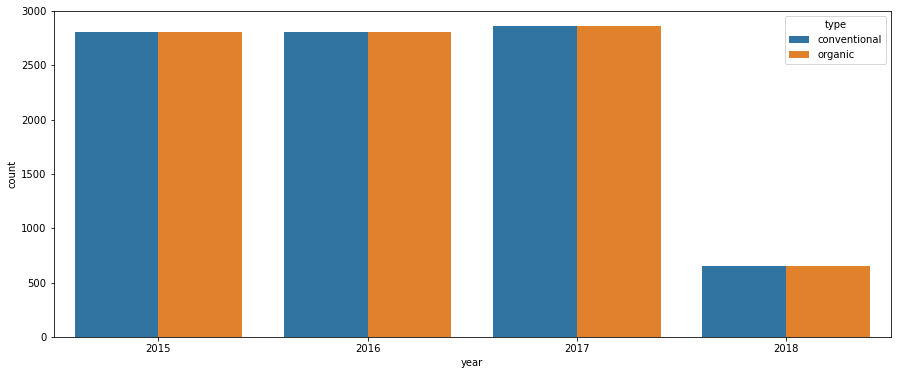

In [57]:
sns.countplot(x='year',hue='type',data=df)

both type of avacado are sold out in same quantity in every year but in 2018 sale of avacado is decreased

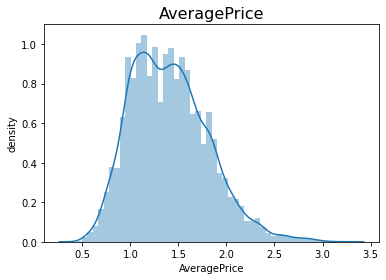

In [54]:
sns.distplot(df["AveragePrice"])
plt.rcParams['figure.figsize']=(15,6)
plt.title("AveragePrice",fontsize=16)
plt.xlabel("AveragePrice")
plt.ylabel("density")
plt.show()

Average Price distribution shows that for most cases price of avocado is between 1 and 1.5

# relation variables to each other

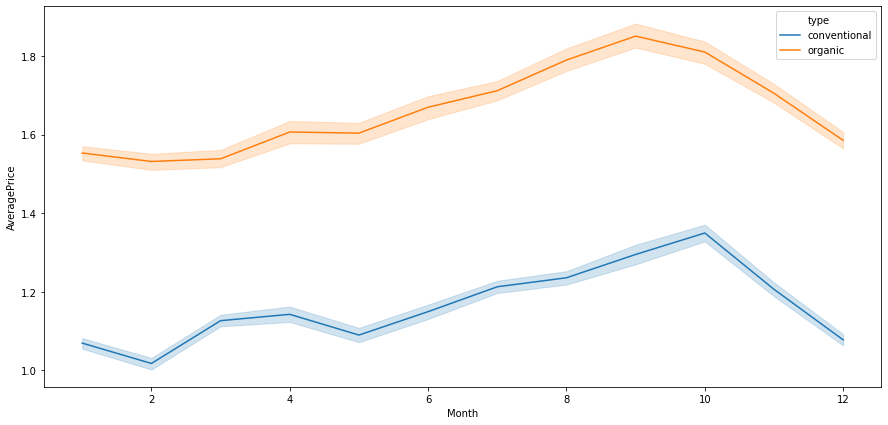

In [55]:
plt.figure(figsize=(15,7))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

Looks like there was a hike between months 8 – 10 for both Conventional and Organic type of Avocados prices

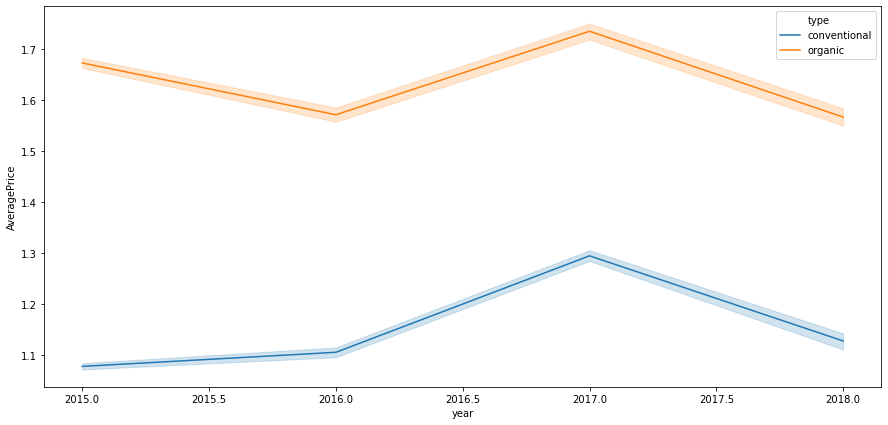

In [56]:
plt.figure(figsize=(15,7))
sns.lineplot(x="year", y="AveragePrice", hue='type', data=df)
plt.show()

both avacado type average price hiked since 2016 to 2017 after it decreased 

In [70]:
a=df.groupby(['region'])['AveragePrice'].sum().sort_values(ascending=False).reset_index()
a

,region,AveragePrice
0,HartfordSpringfield,614.70
1,SanFrancisco,609.82
2,NewYork,583.92
3,Philadelphia,551.66
4,Sacramento,548.09
5,Charlotte,542.84
6,Northeast,541.45
7,Albany,527.63
8,Chicago,526.19
9,RaleighGreensboro,525.63


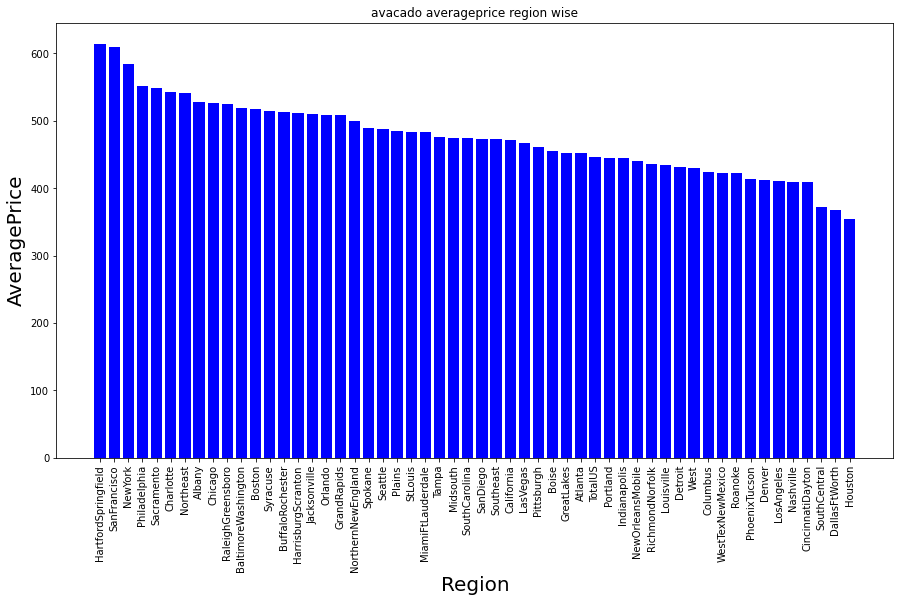

In [75]:
plt.bar('region', 'AveragePrice',data=a,color="blue")
plt.rcParams['figure.figsize']=(15,4)
plt.xlabel("Region",fontsize=20)
plt.ylabel("AveragePrice",fontsize=20)
plt.title("avacado averageprice region wise")
plt.xticks(rotation=90)
plt.show()

# Looks like these region are where price is very high

HartfordSpringfield

SanFrancisco

NewYork

Philadelphia

Sacramento

In [78]:
filter1=df.region!='TotalUS'
df1=df[filter1]
b=df1.groupby(['region'])['Total Volume'].sum().sort_values(ascending=False).reset_index()
b

,region,Total Volume
0,West,1.086779e+09
1,California,1.028982e+09
2,SouthCentral,1.011280e+09
3,Northeast,7.132809e+08
4,Southeast,6.152384e+08
5,GreatLakes,5.896425e+08
6,Midsouth,5.083494e+08
7,LosAngeles,5.078965e+08
8,Plains,3.111885e+08
9,NewYork,2.407341e+08


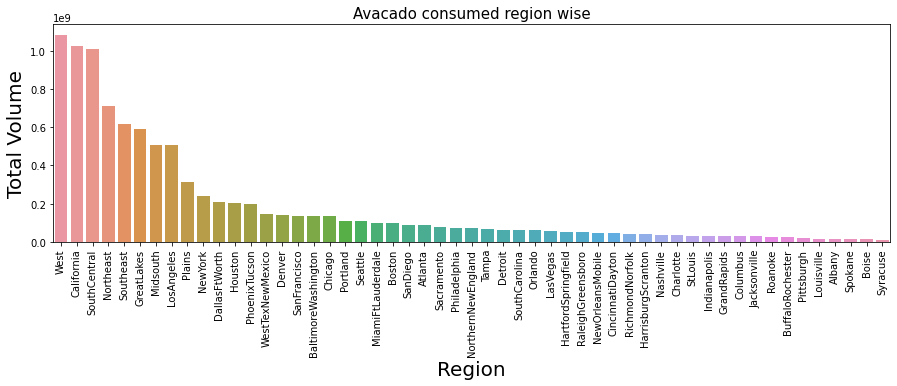

In [81]:
sns.barplot(x='region',y='Total Volume',data=b)
plt.rcParams['figure.figsize']=(15,4)
plt.xlabel("Region",fontsize=20)
plt.ylabel("Total Volume",fontsize=20)
plt.title("Avacado consumed region wise",fontsize=15)
plt.xticks(rotation=90)
plt.show()

# Looks like these region are where Consumption is very high

West

California

SouthCentral

Northeast

Southeast

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000234F2E11A30>,
      dtype=object)

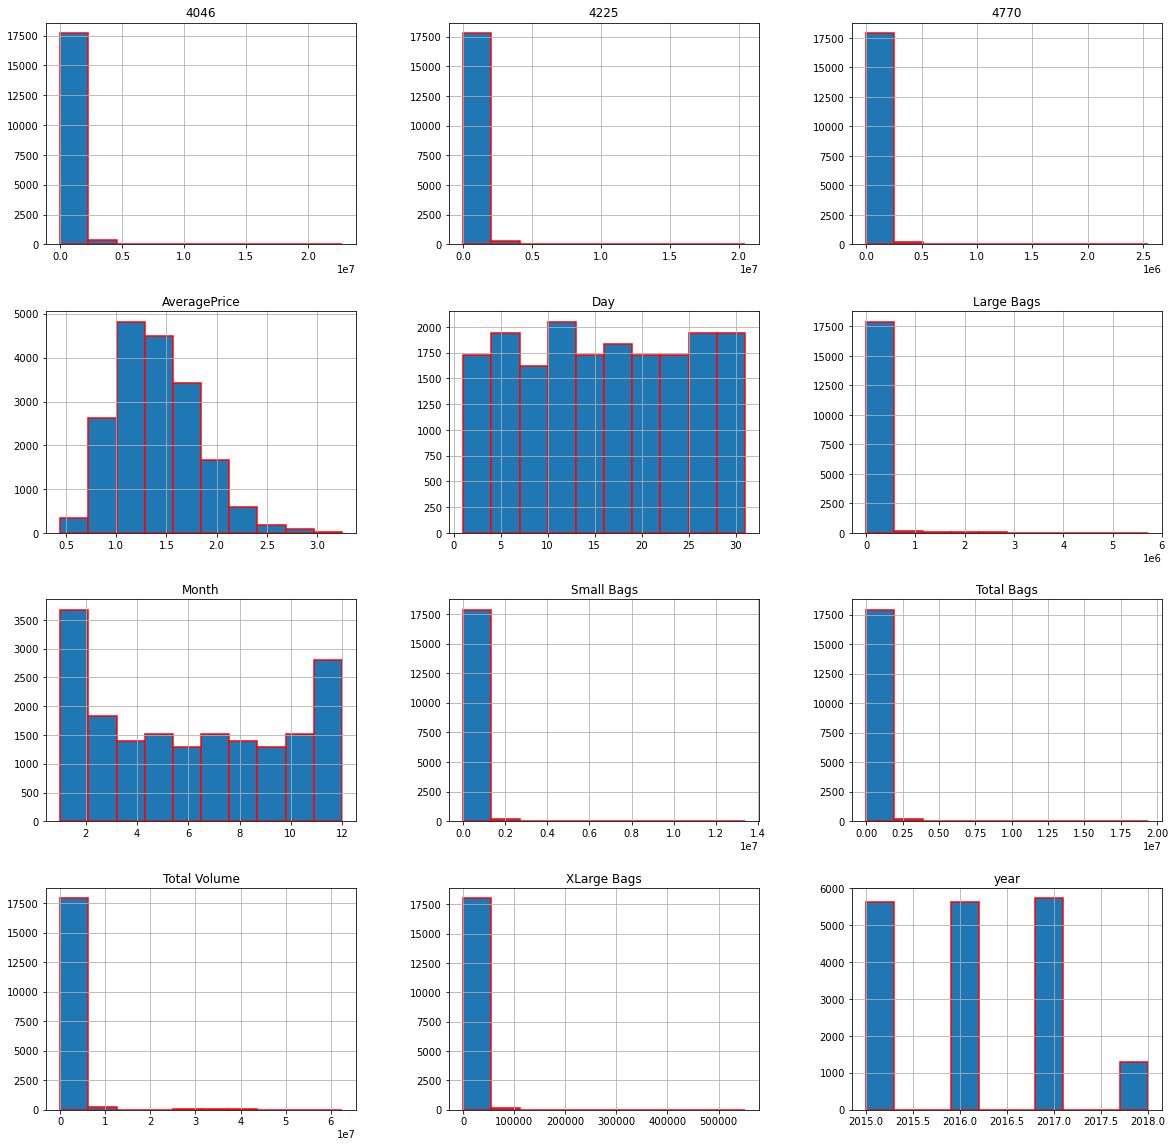

In [88]:
df.hist(edgecolor='red',linewidth=1.5,figsize=(20,20))

from above observation it is clear that data is not normalised

# correlation matrix

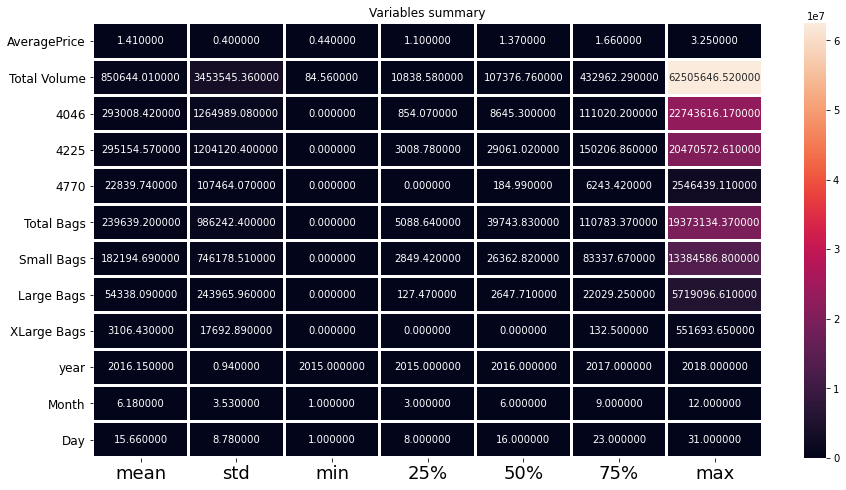

In [87]:
plt.figure(figsize=(15,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variables summary")
plt.show()

As we can from the heatmap above, all the Features are not correleted with the Average Price column, instead most of them are correlated with each other. So now I am bit worried because that will not help us get a good model. Lets try and see.

First we have to do some Feature Engineering on the categorical Features : region and type

# Feature Engineering for Model building

In [91]:
df['region'].nunique()

54

In [92]:
df['type'].nunique()

2

As we can see we have 54 regions and 2 unique types, so it's going to be easy to to transform the type feature to dummies, but for the region its going to be a bit complex, so I decided to drop the entire column.

I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.

In [94]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)
df_final

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,2,4,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,1,28,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,1,21,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,1,14,1


# Model selection/predictions¶

Now our data are ready! lets apply our model which is going to be the Linear Regression because our Target variable 'AveragePrice' is continuous.
Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable

# input split

In [96]:
X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']

# spliting the data

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# LinearRegression

In [98]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.23297133291654204
MSE: 0.0910880280533739
RMSE: 0.3018079323897467


The RMSE is low so we can say that we do have a good model, but lets check to be more sure.
Lets plot the y_test vs the predictions

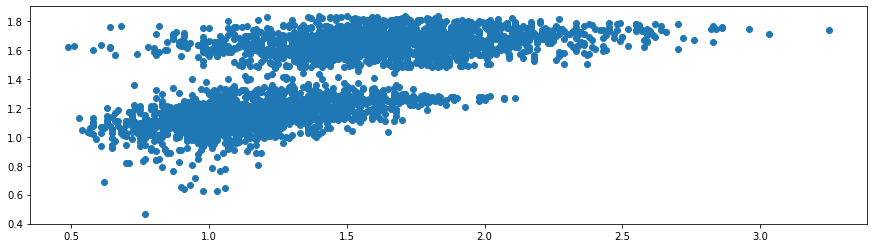

In [99]:
plt.scatter(x=y_test,y=pred)

As we can see that we don't have a straight line so I am not sure that this is the best model we can apply on our data
Lets try working with the Decision Tree Regression model

# DecisionTreeRegressor

In [101]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13752876712328768
MSE: 0.04614575342465753
RMSE: 0.21481562658395578


Very Nice, our RMSE is lower than the previous one we got with Linear Regression.

Text(0, 0.5, 'Predicted Y')

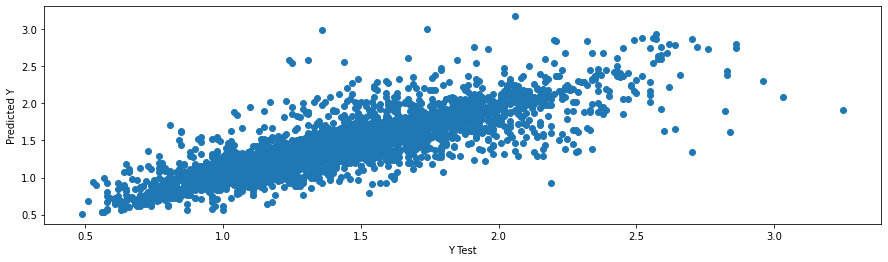

In [102]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Nice, here we can see that we nearly have a straight line, in other words its better than the Linear regression model

# RandomForestRegressor

In [104]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10054241095890408
MSE: 0.021128462093150675
RMSE: 0.14535632801206377


Well as we can see the RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in this case.

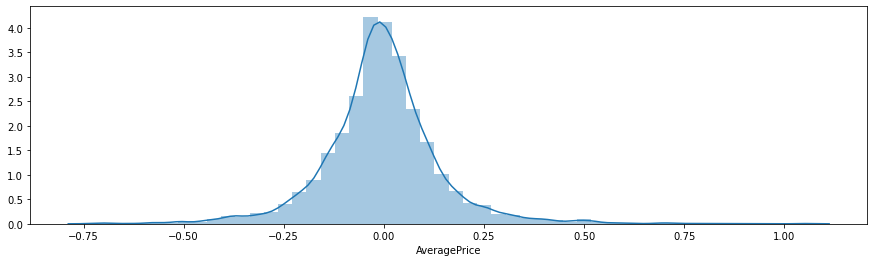

In [105]:
sns.distplot((y_test-pred),bins=50)

Notice here that our residuals looked to be normally distributed and that's really a good sign which means that our model was a correct choice for the data.

# Lets see final Actual Vs Predicted sample.

,Y Test,Pred
8604,0.82,0.9483
2608,0.97,1.0020
14581,1.44,1.3974
4254,0.97,0.9020
16588,1.45,1.4541


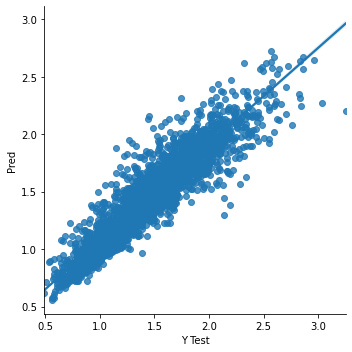

In [106]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data,palette='rainbow')
data.head()

# save the best model

Serialization

let's save RandomForestRegressor

In [107]:
import joblib
joblib.dump(RandomForestRegressor(),"avacadoproject.pkl")

['avacadoproject.pkl']